# James Velardi

## May 6th, 2025

## Final Project Milestone #4

## Plotting The Data

### Purpose of This Project

- This project will investigate vehicle safety data from NHTSA in 2024. Data Science questions will be asked and plotted in determining which cars in 2011-2024 are the safest for consumers. There’s a lot of potential clients who could use this data such as consumers, rental car companies, automobile insurance, etc. For the sake of this project, this project will aim more towards rental car companies, seeing as how important safety is to these companies. Overall, the NHTSA has plenty of good data to use. The plan will be to clean and filter it down to a usable level, as the dataset has a lot of data stored inside of it.

### Data Science Questions to Explore

1.	Which car manufacturers overall have the highest average safety ratings. 
2.	What is the distribution of vehicle types (Passenger Car, Multi-Passenger Car (SUV, Crossover), Vans, and Trucks) and their safety ratings. 
3.	Do cars with advanced safety features (Automatic Emergency Braking, Forward Collision Warning) help improve safety ratings? 
4.	How does the safety of vehicles compare overtime? Are newer vehicles getting much safer?
5.	What do vehicles that rank the lowest in vehicle safety have the most in common? Could it be based on body type, frame type, lack of safety features and airbags, or does it all come down to brand? 


### Import Statements

In [1]:
#Import Pandas
import pandas as pd

#Import Regex
import re

#Import Numpy
import numpy as np

#Import Matplotlib for version checking
import matplotlib

#Import Pyplot
import matplotlib.pyplot as plt

#Import Seaborn
import seaborn as sns

#Print the version of matplotlib
print(f'Matplotlib Version: {matplotlib.__version__}')

#Print the version of Seaborn
print(f'Seaborn Version: {sns.__version__}')

#Print the version of Regex
print(f'Regex Version: {re.__version__}')

#Print the version of Pandas
print(f'Pandas Version: {pd.__version__}')

#Print the version of Numpy
print(f'Numpy Version: {np.__version__}')


Matplotlib Version: 3.10.0
Seaborn Version: 0.13.2
Regex Version: 2.2.1
Pandas Version: 2.2.3
Numpy Version: 1.26.4


### Turn the CSV file into a dataframe

In [2]:
data = 'Safercar_data.csv'

df = pd.read_csv(data, low_memory=False)

df

,MAKE,MODEL,MODEL_YR,BODY_STYLE,VEHICLE_TYPE,DRIVE_TRAIN,PRODUCTION_RELEASE,VEHICLE_CLASS,BODY_FRAME,NUM_OF_SEATING,...,POLE_HIC_36_DRIV,PELVIC_FORCE,ROLLOVER_POSSIBILITY,STATIC_STABI_FACTOR,TIP,ROLL_SAFETY_CONCERN,ROLL_FOOT_NOTES,ROLLOVER_STARS,NHTSA_BACKUP_CAMERA,BACKUP_CAMERA
0,ACURA,INTEGRA,2024,5 HB,PC,FWD,1,NaN,,5,...,235.989,2871.970,0.095,1.4800,No Tip,NaN,NaN,5.0,NaN,NaN
1,ACURA,INTEGRA TYPE-S,2024,5 HB,PC,FWD,1,NaN,,4,...,NaN,NaN,0.095,1.4800,No Tip,NaN,NaN,5.0,NaN,NaN
2,ACURA,MDX,2024,SUV,MPV,AWD,1,NaN,,7,...,549.430,1886.689,0.151,NaN,No Tip,NaN,NaN,NaN,NaN,NaN
3,ACURA,MDX,2024,SUV,MPV,FWD,1,NaN,,7,...,549.430,1886.689,0.151,1.2700,No Tip,NaN,NaN,4.0,NaN,NaN
4,ACURA,RDX,2024,SUV,MPV,AWD,1,NaN,,5,...,485.973,3130.952,0.165,1.2372,No Tip,NaN,NaN,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11023,VOLVO,XC60,2011,SUV,MPV,FWD,1,SUV,Uni-Body,5,...,242.120,3207.978,0.176,1.2160,No Tip,NaN,NaN,4.0,NaN,NaN
11024,VOLVO,XC70,2011,SW,MPV,AWD,1,SUV,Uni-Body,5,...,NaN,NaN,0.000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN
11025,VOLVO,XC70,2011,SW,MPV,FWD,1,SUV,Uni-Body,5,...,NaN,NaN,0.000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN
11026,VOLVO,XC90,2011,SUV,MPV,AWD,1,SUV,Uni-Body,7,...,NaN,NaN,0.179,1.2100,No Tip,NaN,NaN,4.0,NaN,NaN


### Run the describe function

In [3]:
df.describe()

,MODEL_YR,PRODUCTION_RELEASE,MIN_GROSS_WEIGHT,MAX_GROSS_WEIGHT,OVERALL_STARS,FRNT_TEST_NO,FRNT_DRIV_STARS,FRNT_PASS_STARS,OVERALL_FRNT_STARS,CURB_WEIGHT,...,SYMPHYSIS_FORCE_DRIV,SIDE_HIC_36_PASS,PELVIC_FORCE_PASS,POLE_TEST_NO,SIDE_POLE_STARS,POLE_HIC_36_DRIV,PELVIC_FORCE,ROLLOVER_POSSIBILITY,STATIC_STABI_FACTOR,ROLLOVER_STARS
count,11028.000000,11028.000000,10002.000000,10236.000000,4670.000000,4976.000000,4981.000000,4978.000000,4978.000000,5411.000000,...,4557.000000,4411.000000,4411.000000,4976.000000,4983.000000,4568.000000,4568.000000,11028.000000,10776.000000,6118.000000
mean,2017.763783,1.010247,5614.224575,5917.763599,4.562313,9455.062098,4.455129,4.202089,4.283849,4093.355202,...,1402.657576,192.419793,2558.703694,9409.448352,4.798114,353.336207,3225.864553,0.091615,0.732125,3.984962
std,4.004007,0.102495,1673.910034,1907.128440,0.576428,1791.361638,0.638022,0.740989,0.620771,1169.349662,...,528.287458,134.216494,1054.450987,1722.508558,0.632154,717.159456,796.345045,0.103418,0.648867,0.688851
min,2011.000000,1.000000,7.000000,440.000000,2.000000,6940.000000,2.000000,2.000000,2.000000,0.000000,...,481.118000,9.817000,245.903000,6942.000000,1.000000,85.384000,1393.511000,0.000000,0.000000,1.000000
25%,2014.000000,1.000000,4471.250000,4696.000000,4.000000,7975.000000,4.000000,4.000000,4.000000,3452.000000,...,1035.229000,88.700000,1775.072000,8070.000000,5.000000,239.029000,2653.910000,0.000000,0.000000,4.000000
50%,2018.000000,1.000000,5176.000000,5455.000000,5.000000,9248.000000,5.000000,4.000000,4.000000,3989.000000,...,1366.163000,162.245000,2547.281000,9083.500000,5.000000,294.402000,3144.494000,0.095000,1.150000,4.000000
75%,2021.000000,1.000000,6393.000000,6600.000000,5.000000,10704.000000,5.000000,5.000000,5.000000,4679.000000,...,1696.713000,273.763000,3296.632000,10650.000000,5.000000,364.533000,3713.431000,0.164000,1.270000,4.000000
max,2024.000000,3.000000,13000.000000,14000.000000,5.000000,14433.000000,5.000000,5.000000,5.000000,7586.000000,...,3969.616000,819.636000,6357.052000,14460.000000,5.000000,12246.016000,7430.367000,1.330000,1.830000,5.000000


### Get the columns

In [4]:
df.columns

Index(['MAKE', 'MODEL', 'MODEL_YR', 'BODY_STYLE', 'VEHICLE_TYPE',
       'DRIVE_TRAIN', 'PRODUCTION_RELEASE', 'VEHICLE_CLASS', 'BODY_FRAME',
       'NUM_OF_SEATING',
       ...
       'POLE_HIC_36_DRIV', 'PELVIC_FORCE', 'ROLLOVER_POSSIBILITY',
       'STATIC_STABI_FACTOR', 'TIP', 'ROLL_SAFETY_CONCERN', 'ROLL_FOOT_NOTES',
       'ROLLOVER_STARS', 'NHTSA_BACKUP_CAMERA', 'BACKUP_CAMERA'],
      dtype='object', length=128)

### Get the amount of rows and columns

In [5]:
df.shape

(11028, 128)

### Get the data types

In [6]:
df.dtypes

MAKE                    object
MODEL                   object
MODEL_YR                 int64
BODY_STYLE              object
VEHICLE_TYPE            object
                        ...   
ROLL_SAFETY_CONCERN     object
ROLL_FOOT_NOTES         object
ROLLOVER_STARS         float64
NHTSA_BACKUP_CAMERA     object
BACKUP_CAMERA           object
Length: 128, dtype: object

### Get the first few rows in the dataframe

In [7]:
df.head()

,MAKE,MODEL,MODEL_YR,BODY_STYLE,VEHICLE_TYPE,DRIVE_TRAIN,PRODUCTION_RELEASE,VEHICLE_CLASS,BODY_FRAME,NUM_OF_SEATING,...,POLE_HIC_36_DRIV,PELVIC_FORCE,ROLLOVER_POSSIBILITY,STATIC_STABI_FACTOR,TIP,ROLL_SAFETY_CONCERN,ROLL_FOOT_NOTES,ROLLOVER_STARS,NHTSA_BACKUP_CAMERA,BACKUP_CAMERA
0,ACURA,INTEGRA,2024,5 HB,PC,FWD,1,NaN,,5,...,235.989,2871.970,0.095,1.4800,No Tip,NaN,NaN,5.0,NaN,NaN
1,ACURA,INTEGRA TYPE-S,2024,5 HB,PC,FWD,1,NaN,,4,...,NaN,NaN,0.095,1.4800,No Tip,NaN,NaN,5.0,NaN,NaN
2,ACURA,MDX,2024,SUV,MPV,AWD,1,NaN,,7,...,549.430,1886.689,0.151,NaN,No Tip,NaN,NaN,NaN,NaN,NaN
3,ACURA,MDX,2024,SUV,MPV,FWD,1,NaN,,7,...,549.430,1886.689,0.151,1.2700,No Tip,NaN,NaN,4.0,NaN,NaN
4,ACURA,RDX,2024,SUV,MPV,AWD,1,NaN,,5,...,485.973,3130.952,0.165,1.2372,No Tip,NaN,NaN,4.0,NaN,NaN


### Get the last few rows in the dataframe

In [8]:
df.tail()

,MAKE,MODEL,MODEL_YR,BODY_STYLE,VEHICLE_TYPE,DRIVE_TRAIN,PRODUCTION_RELEASE,VEHICLE_CLASS,BODY_FRAME,NUM_OF_SEATING,...,POLE_HIC_36_DRIV,PELVIC_FORCE,ROLLOVER_POSSIBILITY,STATIC_STABI_FACTOR,TIP,ROLL_SAFETY_CONCERN,ROLL_FOOT_NOTES,ROLLOVER_STARS,NHTSA_BACKUP_CAMERA,BACKUP_CAMERA
11023,VOLVO,XC60,2011,SUV,MPV,FWD,1,SUV,Uni-Body,5,...,242.12,3207.978,0.176,1.216,No Tip,NaN,NaN,4.0,NaN,NaN
11024,VOLVO,XC70,2011,SW,MPV,AWD,1,SUV,Uni-Body,5,...,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN
11025,VOLVO,XC70,2011,SW,MPV,FWD,1,SUV,Uni-Body,5,...,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN
11026,VOLVO,XC90,2011,SUV,MPV,AWD,1,SUV,Uni-Body,7,...,NaN,NaN,0.179,1.210,No Tip,NaN,NaN,4.0,NaN,NaN
11027,VOLVO,XC90,2011,SUV,MPV,FWD,1,SUV,Uni-Body,7,...,NaN,NaN,0.191,1.190,No Tip,NaN,NaN,4.0,NaN,NaN


### Get a random row in the dataframe

In [9]:
df.sample()

,MAKE,MODEL,MODEL_YR,BODY_STYLE,VEHICLE_TYPE,DRIVE_TRAIN,PRODUCTION_RELEASE,VEHICLE_CLASS,BODY_FRAME,NUM_OF_SEATING,...,POLE_HIC_36_DRIV,PELVIC_FORCE,ROLLOVER_POSSIBILITY,STATIC_STABI_FACTOR,TIP,ROLL_SAFETY_CONCERN,ROLL_FOOT_NOTES,ROLLOVER_STARS,NHTSA_BACKUP_CAMERA,BACKUP_CAMERA
5523,LEXUS,NX300H,2018,SUV,MPV,AWD,1,SUV,Uni-Body,5,...,542.432,3682.072,0.16,1.248,No Tip,NaN,NaN,4.0,NaN,NaN


### Get a quick summary of the dataframe

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11028 entries, 0 to 11027
Columns: 128 entries, MAKE to BACKUP_CAMERA
dtypes: float64(42), int64(2), object(84)
memory usage: 10.8+ MB


### Observations So Far

- Upon initial viewing of the data, I noticed in the describe function that newer vehicles have higher overall 5-star ratings.

- Since there is a lot of data in this dataset, I am going to filter out the columns that are not needed to answer the data science questions. 

In [11]:
data_df = df[['MAKE','MODEL_YR','VEHICLE_TYPE','DRIVE_TRAIN','BODY_FRAME','BLIND_SPOT_DETECTION','ARS','FRNT_COLLISION_WARNING','LANE_DEPARTURE_WARNING','CRASH_IMMINENT_BRAKE','DYNAMIC_BRAKE_SUPPORT','OVERALL_STARS','BACKUP_CAMERA']]
data_df

,MAKE,MODEL_YR,VEHICLE_TYPE,DRIVE_TRAIN,BODY_FRAME,BLIND_SPOT_DETECTION,ARS,FRNT_COLLISION_WARNING,LANE_DEPARTURE_WARNING,CRASH_IMMINENT_BRAKE,DYNAMIC_BRAKE_SUPPORT,OVERALL_STARS,BACKUP_CAMERA
0,ACURA,2024,PC,FWD,,Standard,Standard,Standard,Standard,Standard,Standard,5.0,NaN
1,ACURA,2024,PC,FWD,,Standard,Standard,Standard,Standard,Standard,Standard,NaN,NaN
2,ACURA,2024,MPV,AWD,,Standard,Standard,Standard,Standard,Standard,Standard,NaN,NaN
3,ACURA,2024,MPV,FWD,,Standard,Standard,Standard,Standard,Standard,Standard,5.0,NaN
4,ACURA,2024,MPV,AWD,,Standard,Standard,Standard,Standard,Standard,Standard,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11023,VOLVO,2011,MPV,FWD,Uni-Body,Optional,Standard,Optional,Optional,NaN,NaN,5.0,NaN
11024,VOLVO,2011,MPV,AWD,Uni-Body,Optional,Standard,Optional,Optional,NaN,NaN,NaN,NaN
11025,VOLVO,2011,MPV,FWD,Uni-Body,Optional,Standard,Optional,Optional,NaN,NaN,NaN,NaN
11026,VOLVO,2011,MPV,AWD,Uni-Body,Optional,Standard,NaN,NaN,NaN,NaN,NaN,NaN


- Upon going over the dataset, I decided to only keep these columns. I'm only interested in the overall 5-star rating of the vehicles and seeing the correlations between the amount of safety features, the frame type, and the vehicle types. 

### Run the info function to check for null values

In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11028 entries, 0 to 11027
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAKE                    11028 non-null  object 
 1   MODEL_YR                11028 non-null  int64  
 2   VEHICLE_TYPE            11028 non-null  object 
 3   DRIVE_TRAIN             11027 non-null  object 
 4   BODY_FRAME              11025 non-null  object 
 5   BLIND_SPOT_DETECTION    7696 non-null   object 
 6   ARS                     8284 non-null   object 
 7   FRNT_COLLISION_WARNING  7345 non-null   object 
 8   LANE_DEPARTURE_WARNING  6775 non-null   object 
 9   CRASH_IMMINENT_BRAKE    6419 non-null   object 
 10  DYNAMIC_BRAKE_SUPPORT   6509 non-null   object 
 11  OVERALL_STARS           4670 non-null   float64
 12  BACKUP_CAMERA           2798 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB



- Since the overall goal of this project is to check for overall safety Ratings, the rows without a rating will be dropped. With 4670 non-null values remaining, this will still be a good sample size to get reliable data.

In [13]:
data_df = data_df.dropna(subset=['OVERALL_STARS'])
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4670 entries, 0 to 11023
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAKE                    4670 non-null   object 
 1   MODEL_YR                4670 non-null   int64  
 2   VEHICLE_TYPE            4670 non-null   object 
 3   DRIVE_TRAIN             4670 non-null   object 
 4   BODY_FRAME              4669 non-null   object 
 5   BLIND_SPOT_DETECTION    3368 non-null   object 
 6   ARS                     3576 non-null   object 
 7   FRNT_COLLISION_WARNING  3346 non-null   object 
 8   LANE_DEPARTURE_WARNING  3193 non-null   object 
 9   CRASH_IMMINENT_BRAKE    2867 non-null   object 
 10  DYNAMIC_BRAKE_SUPPORT   2732 non-null   object 
 11  OVERALL_STARS           4670 non-null   float64
 12  BACKUP_CAMERA           1377 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 510.8+ KB



- Next I will be filling in the null values accordingly. Going over these columns, filling the null values as 'Not Available' will account for either the unknown values or account for the safety feature not being available. I still want to keep the null or empty values later to compare safety ratings of vehicles that have and don't have advanced safety features.

In [14]:
data_df = data_df.fillna('Not Available')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4670 entries, 0 to 11023
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAKE                    4670 non-null   object 
 1   MODEL_YR                4670 non-null   int64  
 2   VEHICLE_TYPE            4670 non-null   object 
 3   DRIVE_TRAIN             4670 non-null   object 
 4   BODY_FRAME              4670 non-null   object 
 5   BLIND_SPOT_DETECTION    4670 non-null   object 
 6   ARS                     4670 non-null   object 
 7   FRNT_COLLISION_WARNING  4670 non-null   object 
 8   LANE_DEPARTURE_WARNING  4670 non-null   object 
 9   CRASH_IMMINENT_BRAKE    4670 non-null   object 
 10  DYNAMIC_BRAKE_SUPPORT   4670 non-null   object 
 11  OVERALL_STARS           4670 non-null   float64
 12  BACKUP_CAMERA           4670 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 510.8+ KB


In [15]:
data_df

,MAKE,MODEL_YR,VEHICLE_TYPE,DRIVE_TRAIN,BODY_FRAME,BLIND_SPOT_DETECTION,ARS,FRNT_COLLISION_WARNING,LANE_DEPARTURE_WARNING,CRASH_IMMINENT_BRAKE,DYNAMIC_BRAKE_SUPPORT,OVERALL_STARS,BACKUP_CAMERA
0,ACURA,2024,PC,FWD,,Standard,Standard,Standard,Standard,Standard,Standard,5.0,Not Available
3,ACURA,2024,MPV,FWD,,Standard,Standard,Standard,Standard,Standard,Standard,5.0,Not Available
4,ACURA,2024,MPV,AWD,,Standard,Standard,Standard,Standard,Standard,Standard,5.0,Not Available
5,ACURA,2024,MPV,FWD,,Standard,Standard,Standard,Standard,Standard,Standard,5.0,Not Available
6,ACURA,2024,PC,AWD,,Optional,Standard,Standard,Standard,Standard,Standard,5.0,Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,TOYOTA,2011,MPV,AWD,Uni-body,Not Available,Standard,Not Available,Not Available,Not Available,Not Available,4.0,Not Available
10996,TOYOTA,2011,MPV,FWD,Uni-body,Not Available,Standard,Not Available,Not Available,Not Available,Not Available,4.0,Not Available
11007,VOLKSWAGEN,2011,PC,FWD,Uni-Body,Not Available,Standard,Not Available,Not Available,Not Available,Not Available,4.0,Not Available
11022,VOLVO,2011,MPV,AWD,Uni-Body,Optional,Standard,Optional,Optional,Not Available,Not Available,5.0,Not Available



- Upon displaying the dataframe again, I noticed that this data still has blank spaces underneath the BODY_FRAME column. So I will run the value_counts function to see if the values turn up as a blank space. 

In [16]:
data_df['BODY_FRAME'].value_counts()

BODY_FRAME
Uni-Body         2867
Frame-Based       807
                  545
uni-body          264
body-on-frame     147
Uni-body           33
Body on frame       6
Not Available       1
Name: count, dtype: int64


- Since I also noticed that other columns have empty cells with spaces in them, I went ahead and applied a regex for empty spaces to fill the blocks in as Not Available.

In [17]:
data_df = data_df.replace(r'^\s*$', 'Not Available' , regex=True)


- I'm going to loop through all the dataframe columns and print each one to check for empty spaces and to see if there's any more clean up to do.

In [18]:
for i in data_df.columns:
    print(data_df[i].value_counts())
    print()

MAKE
FORD             518
CHEVROLET        436
TOYOTA           407
GMC              317
NISSAN           230
HONDA            201
LEXUS            180
KIA              168
BMW              166
HYUNDAI          165
CADILLAC         149
AUDI             147
LINCOLN          143
VOLKSWAGEN       135
BUICK            126
RAM              122
MAZDA            119
VOLVO            107
DODGE            103
ACURA             98
SUBARU            95
JEEP              92
MITSUBISHI        91
MERCEDES-BENZ     85
INFINITI          77
TESLA             59
CHRYSLER          52
GENESIS           29
MINI              16
SUZUKI             9
FIAT               7
MERCURY            7
POLESTAR           6
SMART              5
SAAB               2
CODA               1
Name: count, dtype: int64

MODEL_YR
2021    401
2022    386
2020    371
2015    369
2017    361
2016    361
2014    360
2018    359
2019    354
2013    339
2023    321
2012    277
2024    235
2011    176
Name: count, dtype: int64

VEHICLE_


- After running these cells, it's pretty clear there's a lot of meticulous clean-up that has to be done. Some of these value counts can be joined together, and some of these options can be deleted altogether. 

In [19]:
### Clean up the BODY-FRAME Column
data_df['BODY_FRAME'] = data_df['BODY_FRAME'].str.replace('Uni-body', 'Uni-Body')
data_df['BODY_FRAME'] = data_df['BODY_FRAME'].str.replace('uni-body', 'Uni-Body')
data_df['BODY_FRAME'] = data_df['BODY_FRAME'].str.replace('Body on frame', 'body-on-frame')
data_df['BODY_FRAME'] = data_df['BODY_FRAME'].str.replace('body-on-frame', 'Body-On-Frame')

#Run the value_counts to to check new data
data_df['BODY_FRAME'].value_counts()

BODY_FRAME
Uni-Body         3164
Frame-Based       807
Not Available     546
Body-On-Frame     153
Name: count, dtype: int64

-  After running the value counts for the BLIND_SPOT_DETECTION column, most of the value counts are not clear enough or of substantial enough value to get a reliable graph out of, so these will either be renamed or deleted.

In [20]:
#Clean the BLIND_SPOT_DETECTION column
counts = data_df['BLIND_SPOT_DETECTION'].value_counts()

#Delete cells that are both unclear datawise and statistically insignificant
for value, count in counts.items():
    if count < 8:
        data_df['BLIND_SPOT_DETECTION'] = data_df['BLIND_SPOT_DETECTION'].replace(value, np.nan) 

#Cells to be renamed
data_df['BLIND_SPOT_DETECTION'] = data_df['BLIND_SPOT_DETECTION'].replace('No', 'Not Available')
data_df['BLIND_SPOT_DETECTION'] = data_df['BLIND_SPOT_DETECTION'].replace('optional', 'Optional')
data_df['BLIND_SPOT_DETECTION'] = data_df['BLIND_SPOT_DETECTION'].replace('Not Equipped', 'Not Available')
data_df['BLIND_SPOT_DETECTION'] = data_df['BLIND_SPOT_DETECTION'].replace('Yes', 'Standard')
data_df['BLIND_SPOT_DETECTION'] = data_df['BLIND_SPOT_DETECTION'].replace('Side Blind Zone - Standard', 'Standard')
data_df['BLIND_SPOT_DETECTION'] = data_df['BLIND_SPOT_DETECTION'].replace('Side Blind Zone - Avail', 'Standard')

#Delete all new NaN's
data_df = data_df.dropna()

#Run the value_counts to to check new data
data_df['BLIND_SPOT_DETECTION'].value_counts()


BLIND_SPOT_DETECTION
Optional         2254
Not Available    1365
Standard          971
Name: count, dtype: int64

- The values in the rest of the columns will be renamed and consolidated

In [21]:
#Clean the ARS column
data_df['ARS'] = data_df['ARS'].replace('Available', 'Optional')
data_df['ARS'] = data_df['ARS'].replace('Standard/Optional', 'Optional')
data_df['ARS'] = data_df['ARS'].replace('Standard, Optional', 'Optional')
data_df['ARS'] = data_df['ARS'].replace('Optional/None', 'Optional')

#Run the value_counts to to check new data
data_df['ARS'].value_counts()

ARS
Standard         2116
Optional         1253
Not Available    1221
Name: count, dtype: int64

In [22]:
# Clean the FRNT_COLLISION_WARNING column

data_df['FRNT_COLLISION_WARNING'] = data_df['FRNT_COLLISION_WARNING'].replace('optional', 'Optional')
data_df['FRNT_COLLISION_WARNING'] = data_df['FRNT_COLLISION_WARNING'].replace('standard', 'Standard')
data_df['FRNT_COLLISION_WARNING'] = data_df['FRNT_COLLISION_WARNING'].replace('Standard & Opti', 'Standard')
data_df['FRNT_COLLISION_WARNING'] = data_df['FRNT_COLLISION_WARNING'].replace('None', 'Not Available')
data_df['FRNT_COLLISION_WARNING'] = data_df['FRNT_COLLISION_WARNING'].replace('TBD', 'Not Available')
data_df['FRNT_COLLISION_WARNING'] = data_df['FRNT_COLLISION_WARNING'].replace('Both', 'Optional')
data_df['FRNT_COLLISION_WARNING'] = data_df['FRNT_COLLISION_WARNING'].replace('NONE', 'Not Available')

#Run the value_counts to to check new data
data_df['FRNT_COLLISION_WARNING'].value_counts()


FRNT_COLLISION_WARNING
Optional         1699
Standard         1602
Not Available    1289
Name: count, dtype: int64

In [23]:
# Clean the LANE_DEPARTURE_WARNING column
data_df['LANE_DEPARTURE_WARNING'] = data_df['LANE_DEPARTURE_WARNING'].replace('optional', 'Optional')
data_df['LANE_DEPARTURE_WARNING'] = data_df['LANE_DEPARTURE_WARNING'].replace('standard', 'Optional')
data_df['LANE_DEPARTURE_WARNING'] = data_df['LANE_DEPARTURE_WARNING'].replace('Both', 'Optional')
data_df['LANE_DEPARTURE_WARNING'] = data_df['LANE_DEPARTURE_WARNING'].replace('Yes', 'Standard')
data_df['LANE_DEPARTURE_WARNING'] = data_df['LANE_DEPARTURE_WARNING'].replace('TBD', 'Not Available')
data_df['LANE_DEPARTURE_WARNING'] = data_df['LANE_DEPARTURE_WARNING'].replace('No', 'Not Available')
data_df['LANE_DEPARTURE_WARNING'] = data_df['LANE_DEPARTURE_WARNING'].replace('NONE', 'Not Available')

#Run the value_counts to to check new data
data_df['LANE_DEPARTURE_WARNING'].value_counts()

LANE_DEPARTURE_WARNING
Optional         1782
Not Available    1463
Standard         1345
Name: count, dtype: int64

In [24]:
# Clean the CRASH_IMMINENT_BRAKE column
data_df['CRASH_IMMINENT_BRAKE'] = data_df['CRASH_IMMINENT_BRAKE'].replace('NONE', 'Not Available')
data_df['CRASH_IMMINENT_BRAKE'] = data_df['CRASH_IMMINENT_BRAKE'].replace('optional', 'Optional')
data_df['CRASH_IMMINENT_BRAKE'] = data_df['CRASH_IMMINENT_BRAKE'].replace('standard', 'Standard')
data_df['CRASH_IMMINENT_BRAKE'] = data_df['CRASH_IMMINENT_BRAKE'].replace('Option', 'Optional')
data_df['CRASH_IMMINENT_BRAKE'] = data_df['CRASH_IMMINENT_BRAKE'].replace('Both', 'Optional')
data_df['CRASH_IMMINENT_BRAKE'] = data_df['CRASH_IMMINENT_BRAKE'].replace('TBD', 'Not Available')

#Run the value_counts to to check new data
data_df['CRASH_IMMINENT_BRAKE'].value_counts()

CRASH_IMMINENT_BRAKE
Not Available    1824
Standard         1580
Optional         1186
Name: count, dtype: int64

In [25]:
# Clean the DYNAMIC_BRAKE_SUPPORT column
data_df['DYNAMIC_BRAKE_SUPPORT'] = data_df['DYNAMIC_BRAKE_SUPPORT'].replace('NONE', 'Not Available')
data_df['DYNAMIC_BRAKE_SUPPORT'] = data_df['DYNAMIC_BRAKE_SUPPORT'].replace('standard', 'Standard')
data_df['DYNAMIC_BRAKE_SUPPORT'] = data_df['DYNAMIC_BRAKE_SUPPORT'].replace('Both', 'Optional')
data_df['DYNAMIC_BRAKE_SUPPORT'] = data_df['DYNAMIC_BRAKE_SUPPORT'].replace('optional', 'Optional')
data_df['DYNAMIC_BRAKE_SUPPORT'] = data_df['DYNAMIC_BRAKE_SUPPORT'].replace('TBD', 'Not Available')

data_df['DYNAMIC_BRAKE_SUPPORT'].value_counts()

DYNAMIC_BRAKE_SUPPORT
Not Available    1958
Standard         1562
Optional         1070
Name: count, dtype: int64

In [26]:
# Clean the BACKUP_CAMERA column
data_df['BACKUP_CAMERA'] = data_df['BACKUP_CAMERA'].replace('No', 'Not Available')
data_df['BACKUP_CAMERA'] = data_df['BACKUP_CAMERA'].replace('Yes', 'Standard')

#Run the value_counts to to check new data
data_df['BACKUP_CAMERA'].value_counts()

BACKUP_CAMERA
Not Available    3255
Standard          669
Optional          666
Name: count, dtype: int64

In [27]:
# Clean the DRIVE_TRAIN column
data_df['DRIVE_TRAIN'] = data_df['DRIVE_TRAIN'].replace('AWD ', 'AWD')

#Run the value_counts to to check new data
data_df['DRIVE_TRAIN'].value_counts()

DRIVE_TRAIN
FWD    1644
AWD    1371
RWD     644
4WD     540
2WD     224
4x2      84
4x4      83
Name: count, dtype: int64

- I'm gonna run the value_counts in all the columns one last time to confirm our data is cleaned.

In [28]:
for i in data_df.columns:
    print(data_df[i].value_counts())
    print()

MAKE
FORD             518
CHEVROLET        427
TOYOTA           391
GMC              305
NISSAN           229
HONDA            199
LEXUS            175
KIA              168
BMW              166
HYUNDAI          163
AUDI             147
LINCOLN          143
CADILLAC         139
VOLKSWAGEN       135
RAM              122
BUICK            117
MAZDA            112
DODGE            103
VOLVO            103
ACURA             96
SUBARU            95
JEEP              92
MITSUBISHI        91
MERCEDES-BENZ     85
INFINITI          77
TESLA             59
CHRYSLER          51
GENESIS           29
MINI              16
SUZUKI             9
FIAT               7
MERCURY            7
POLESTAR           6
SMART              5
SAAB               2
CODA               1
Name: count, dtype: int64

MODEL_YR
2021    400
2022    380
2020    371
2015    367
2017    361
2016    361
2018    359
2019    354
2023    321
2014    320
2013    311
2012    276
2024    235
2011    174
Name: count, dtype: int64

VEHICLE_

### Turn the cleaned up dataframe into a csv file

In [29]:
data_df.to_csv('cleaned_data.csv', index=False)


### Now that the data is cleaned, it's now a lot easier to start plotting our data

In [30]:
plot_data = 'cleaned_data.csv'

plot_df = pd.read_csv(plot_data, low_memory=False)

plot_df

,MAKE,MODEL_YR,VEHICLE_TYPE,DRIVE_TRAIN,BODY_FRAME,BLIND_SPOT_DETECTION,ARS,FRNT_COLLISION_WARNING,LANE_DEPARTURE_WARNING,CRASH_IMMINENT_BRAKE,DYNAMIC_BRAKE_SUPPORT,OVERALL_STARS,BACKUP_CAMERA
0,ACURA,2024,PC,FWD,Not Available,Standard,Standard,Standard,Standard,Standard,Standard,5.0,Not Available
1,ACURA,2024,MPV,FWD,Not Available,Standard,Standard,Standard,Standard,Standard,Standard,5.0,Not Available
2,ACURA,2024,MPV,AWD,Not Available,Standard,Standard,Standard,Standard,Standard,Standard,5.0,Not Available
3,ACURA,2024,MPV,FWD,Not Available,Standard,Standard,Standard,Standard,Standard,Standard,5.0,Not Available
4,ACURA,2024,PC,AWD,Not Available,Optional,Standard,Standard,Standard,Standard,Standard,5.0,Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4585,TOYOTA,2011,MPV,AWD,Uni-Body,Not Available,Standard,Not Available,Not Available,Not Available,Not Available,4.0,Not Available
4586,TOYOTA,2011,MPV,FWD,Uni-Body,Not Available,Standard,Not Available,Not Available,Not Available,Not Available,4.0,Not Available
4587,VOLKSWAGEN,2011,PC,FWD,Uni-Body,Not Available,Standard,Not Available,Not Available,Not Available,Not Available,4.0,Not Available
4588,VOLVO,2011,MPV,AWD,Uni-Body,Optional,Standard,Optional,Optional,Not Available,Not Available,5.0,Not Available


### Question 1: Which car manufacturers overall have the highest average safety ratings?

- I want to get the highest average safety rating based on the OVERALL_STARS column. Some manufacturers on this dataset have a much bigger sample size compared to other brands, so getting the average instead of getting the total count of vehicles with 5-stars would more sense and give us a better insight as to which manufacturers rate higher in safety.

In [31]:
question1df = plot_df[['MAKE', 'OVERALL_STARS']]

averages = question1df.groupby('MAKE')['OVERALL_STARS'].mean().to_dict()
sorted_averages = sorted(averages.items(), key = lambda item: item[1], reverse=True)

q1sorted_df = pd.DataFrame(sorted_averages, columns = ['MAKE', 'AVERAGE_STARS'])

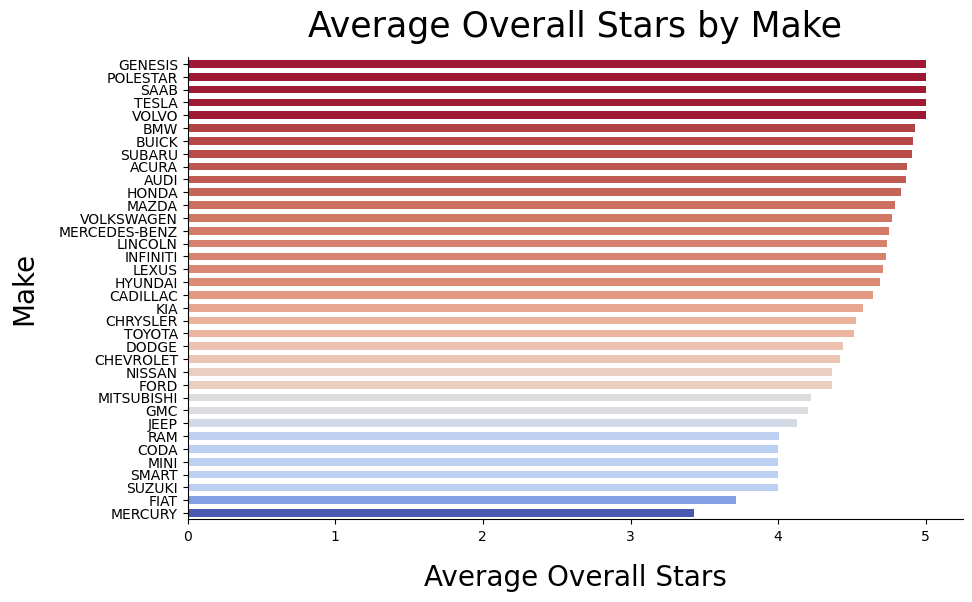

In [32]:
plt.figure(figsize = (10,6))

sns.barplot(x = 'AVERAGE_STARS', y = 'MAKE', data = q1sorted_df, width = .6, palette = 'coolwarm', hue = 'AVERAGE_STARS', legend = False)

# Add title and labels
plt.title('Average Overall Stars by Make', fontsize = 25, pad = 15)
plt.xlabel('Average Overall Stars', fontsize = 20, labelpad = 15)
plt.ylabel('Make', fontsize = 20, labelpad = 15)
sns.despine()


- After getting the overall averages, I now want to see what the sample sizes are for each model. Some cars can have a really high average rating, but if the sample size if really small, we won't have enough safety data to confidently assess the safety of the vehicle. 

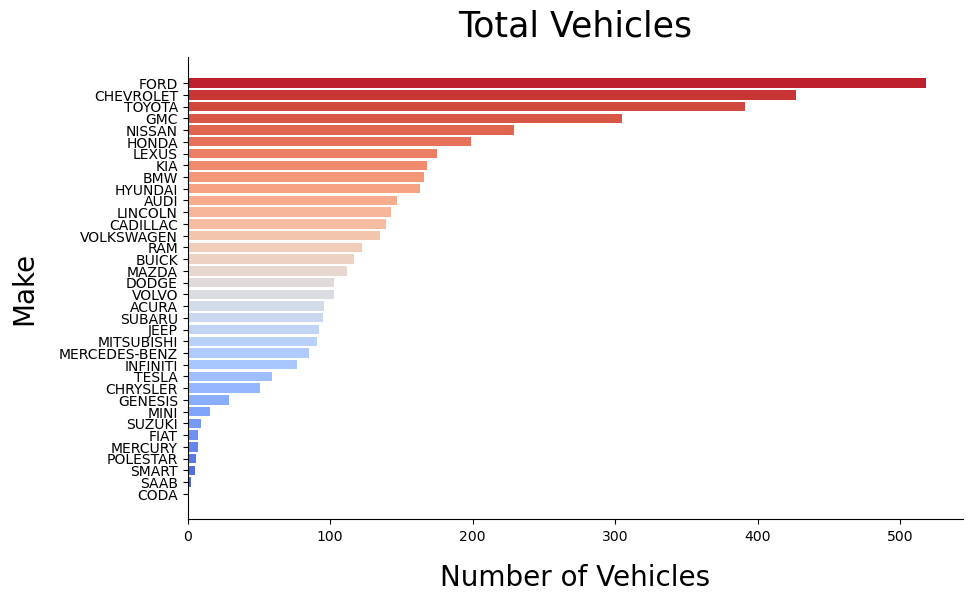

In [33]:
value_counts = question1df['MAKE'].value_counts()

sorted_values = value_counts.sort_values(ascending=True)

plt.figure(figsize = (10,6))

palette = sns.color_palette('coolwarm', len(sorted_values))

plt.barh(sorted_values.index, sorted_values.values, color=palette)

# Add title and labels
plt.title('Total Vehicles', fontsize = 25, pad = 15)
plt.xlabel('Number of Vehicles', fontsize = 20, labelpad = 15)
plt.ylabel('Make', fontsize = 20, labelpad = 15)

sns.despine()

plt.show()


- After ploting out the amount of vehicles in this dataset, it's clear that the cars with the highest 5-star average safety rating have a really small sample size with the exception of Volvo, which has around a 100 vehicles in this data set. Overall, the manufacturers that have a good sample size rate above a 4-star safety rating. 

### Question 2: What is the distribution of vehicle types (PC = Passenger Car, MPV = Multi-Passenger Car (SUV, Crossover), Vans, and Trucks) and their safety ratings.

In [34]:
question2df = plot_df[['VEHICLE_TYPE', 'OVERALL_STARS']]


averages2 = question2df.groupby('VEHICLE_TYPE')['OVERALL_STARS'].mean().to_dict()
sorted_averages2 = sorted(averages2.items(), key = lambda item: item[1], reverse=True)
q2sorted_df = pd.DataFrame(sorted_averages2, columns = ['VEHICLE_TYPE', 'AVERAGE_STARS'])


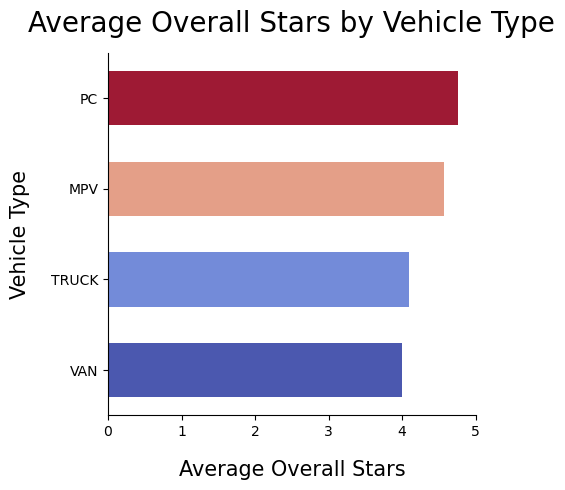

In [35]:
plt.figure(figsize = (5,5))

sns.barplot(x = 'AVERAGE_STARS', y = 'VEHICLE_TYPE', data = q2sorted_df, width = 0.6, palette = 'coolwarm', hue = 'AVERAGE_STARS', legend = False)


# Add title and labels
plt.title('Average Overall Stars by Vehicle Type', fontsize = 20, pad = 15)
plt.xlabel('Average Overall Stars', fontsize = 15, labelpad = 15)
plt.ylabel('Vehicle Type', fontsize = 15, labelpad = 15)


# Show the plot
plt.tight_layout()

sns.despine()

plt.show()

- For this one, since there are only 4 types of vehicles, I'll just run the value_counts function for the total amount of each vehicle type to assess if these average ratings are reliable. 

In [36]:
question2df['VEHICLE_TYPE'].value_counts()

VEHICLE_TYPE
MPV      2070
PC       1708
TRUCK     806
VAN         6
Name: count, dtype: int64

- Overall, in terms of safetey, passenger cars like sedans and coupes take the lead, while multi-passenger cars like SUV's come shortly behind. 

### Question 3: Do cars with advanced safety features (Automatic Emergency Braking, Forward Collision Warning) help improve safety ratings? 

- I will now get the averages of each safety feature and their ratings using seaborn's barplot, which automatically averages the values. 

In [37]:
question3df = plot_df[['BLIND_SPOT_DETECTION','ARS','FRNT_COLLISION_WARNING','LANE_DEPARTURE_WARNING','CRASH_IMMINENT_BRAKE','DYNAMIC_BRAKE_SUPPORT','OVERALL_STARS', 'BACKUP_CAMERA']]


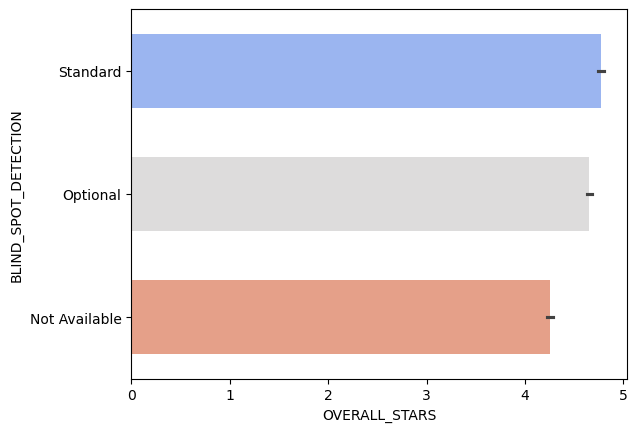

In [38]:
sns.barplot(x = 'OVERALL_STARS', y = 'BLIND_SPOT_DETECTION', data = question3df, width = 0.6, palette = 'coolwarm', hue = 'BLIND_SPOT_DETECTION', legend = False)

plt.show()

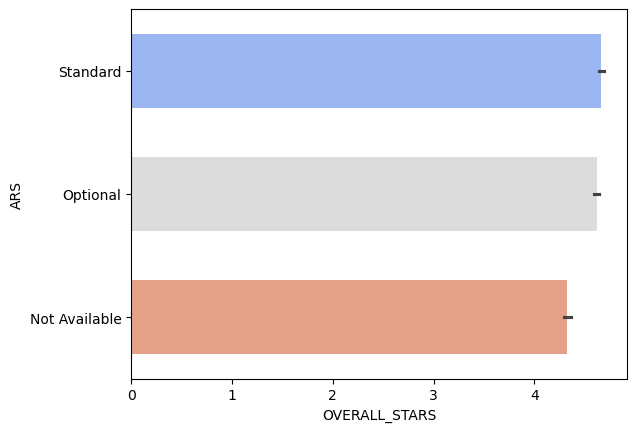

In [39]:
sns.barplot(x = 'OVERALL_STARS', y = 'ARS', data = question3df, width = 0.6, palette = 'coolwarm', hue = 'ARS', legend = False)
plt.show()

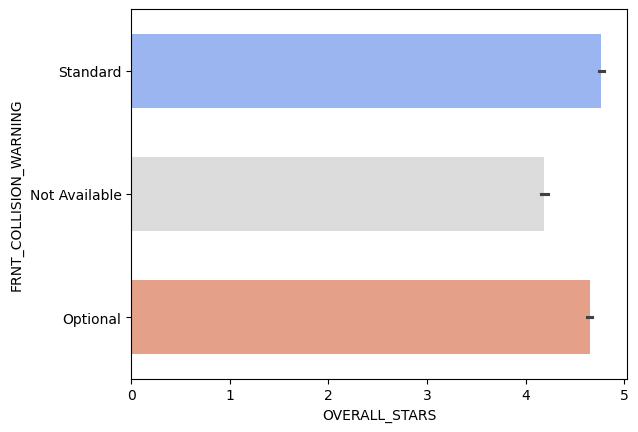

In [40]:
sns.barplot(x = 'OVERALL_STARS', y = 'FRNT_COLLISION_WARNING', data = question3df, width = 0.6, palette = 'coolwarm', hue = 'FRNT_COLLISION_WARNING', legend = False)
plt.show()

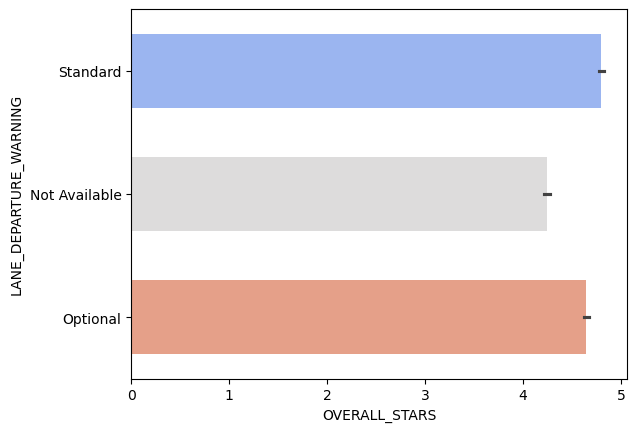

In [41]:
sns.barplot(x = 'OVERALL_STARS', y = 'LANE_DEPARTURE_WARNING', data = question3df, width = 0.6, palette = 'coolwarm', hue = 'LANE_DEPARTURE_WARNING', legend = False)
plt.show()

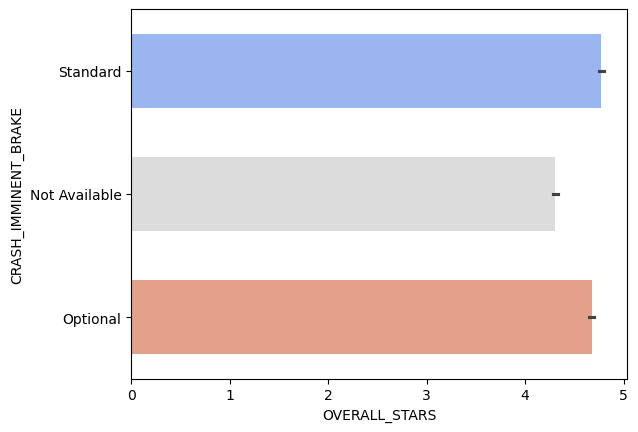

In [42]:
sns.barplot(x = 'OVERALL_STARS', y = 'CRASH_IMMINENT_BRAKE', data = question3df, width = 0.6, palette = 'coolwarm', hue = 'CRASH_IMMINENT_BRAKE', legend = False)
plt.show()

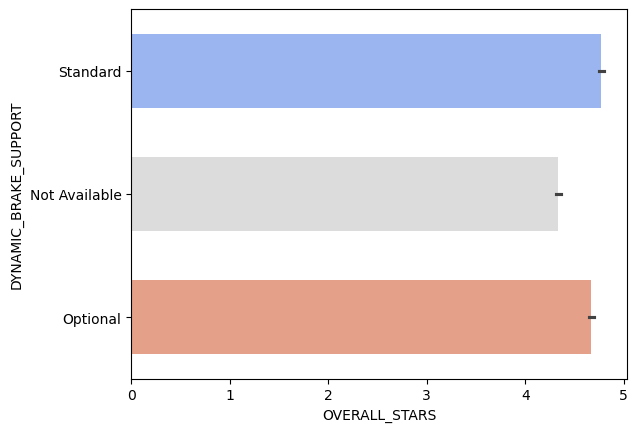

In [43]:
sns.barplot(x = 'OVERALL_STARS', y = 'DYNAMIC_BRAKE_SUPPORT', data = question3df, width = 0.6, palette = 'coolwarm', hue = 'DYNAMIC_BRAKE_SUPPORT', legend = False)
plt.show()

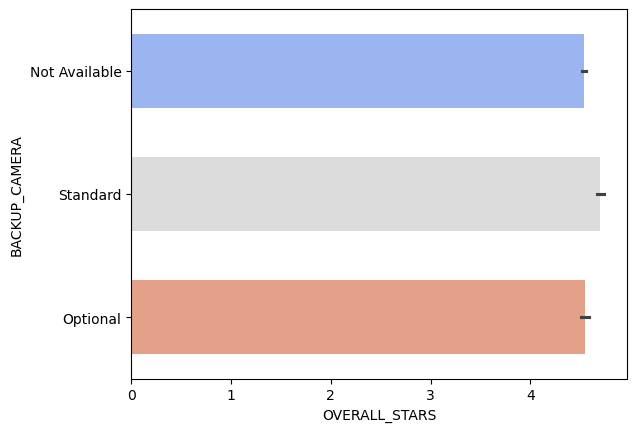

In [44]:
sns.barplot(x = 'OVERALL_STARS', y = 'BACKUP_CAMERA', data = question3df, width = 0.6, palette = 'coolwarm', hue = 'BACKUP_CAMERA', legend = False)
plt.show()

<br>
<br>
<br>
- It's clear from the data that safety features do help increase safety ratings of vehicles, which doesn't come as too much of a surprise.
<br>
<br>
<br>


### Question 4: How does the safety of vehicles compare overtime? Are newer vehicles getting much safer?

- I will now use Seaborn's lineplot to automatically average out the safety ratings for each year.

In [45]:
question4df = plot_df[['MODEL_YR', 'OVERALL_STARS']]

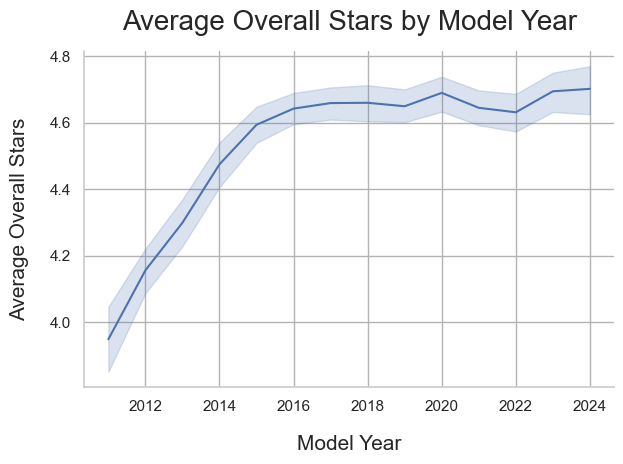

In [46]:
sns.set()

sns.set_style("whitegrid", {"grid.color": ".7"})

sns.lineplot(x = 'MODEL_YR', y = 'OVERALL_STARS', data = question4df)


# Add title and labels
plt.title('Average Overall Stars by Model Year', fontsize = 20, pad = 15)
plt.xlabel('Model Year', fontsize = 15, labelpad = 15)
plt.ylabel('Average Overall Stars', fontsize = 15, labelpad = 15)


# Show the plot
plt.tight_layout()

sns.despine()

plt.show()

### Question 5: What do vehicles that rank the lowest in vehicle safety have the most in common? Could it be based on body type, frame type, lack of safety features and airbags, or does it all come down to brand?

- For this question, simply using Pandas to get the most occured values in each column would be the best way to go instead of plotting. I will filter out the dataframe for vehicles that have 2-star ratings, which were the lowest safety scores in this dataset.

In [47]:
question5df = plot_df[plot_df['OVERALL_STARS'] == 2.0]

question5df = question5df.drop('OVERALL_STARS', axis = 1)

print('Common Values Among 2-Star Vehicles')
print()
print(question5df.mode().sum())

Common Values Among 2-Star Vehicles

MAKE                               FORD
MODEL_YR                           2013
VEHICLE_TYPE                      TRUCK
DRIVE_TRAIN                         RWD
BODY_FRAME                  Frame-Based
BLIND_SPOT_DETECTION      Not Available
ARS                            Standard
FRNT_COLLISION_WARNING    Not Available
LANE_DEPARTURE_WARNING    Not Available
CRASH_IMMINENT_BRAKE      Not Available
DYNAMIC_BRAKE_SUPPORT     Not Available
BACKUP_CAMERA             Not Available
dtype: object


- The findings here seem to align with the rest how the data has been plotted out, with the exception of Ford as a manufacturer. According to the findings found in question 1, Ford gets an overall average safety rating above a four. Since Ford is the biggest sample size on this dataset, I'm going to add a dataframe with 3-Star Rated vechiles, since a 3-Star rating is still relatively low. 

In [51]:
question5df_2 = plot_df[plot_df['OVERALL_STARS'] == 3.0]

question5df_2 = question5df_2.drop('OVERALL_STARS', axis = 1)

concated_5 = pd.concat([question5df, question5df_2])

print('Common Values Among 2-Star and 3-Star Vehicles')
print()
print(concated_5.mode().sum())

Common Values Among 2-Star and 3-Star Vehicles

MAKE                               FORD
MODEL_YR                           2011
VEHICLE_TYPE                      TRUCK
DRIVE_TRAIN                         RWD
BODY_FRAME                     Uni-Body
BLIND_SPOT_DETECTION      Not Available
ARS                       Not Available
FRNT_COLLISION_WARNING    Not Available
LANE_DEPARTURE_WARNING    Not Available
CRASH_IMMINENT_BRAKE      Not Available
DYNAMIC_BRAKE_SUPPORT     Not Available
BACKUP_CAMERA             Not Available
dtype: object


- Looks like older Fords, trucks, and rear wheel drive vehicles still rank pretty low in terms of safety ratings. The only other thing that changed was the frame-type and ARS safety feature as well. That's not too surprising, given that most vehicles nowadays are a unibody design. Also the ARS safety feature coming up as not available is not too surprising either, given that our sample size increased by over 100. 

### Conclusions

- After plotting out this data, it can confidently be said that newer passenger cars (Sedans, Coupes) with advanced safety features are the safest vehicles to buy. Trucks and Rear wheel drive vehicles, on the other hand, tend to be less safe. If I were a rental car company looking into buying new cars for my fleet, I would look at any of the car brands that rank about a 4.5 average safety or higher on the list such as Honda, Hyundai, and Mazda.

- I was surprised by a few of the findings. For one, I thought Toyota would've ranked a little bit higher in safety than it did. I also though SUV's would've ranked higher due to their heavier frame. Then again, those cars due tend to rollover a bit easier.

- Overall, this data for the most part didn't really surprise me. It's still good reliable data to use in figuring out which vehicle is the safest to buy.